## Нейросеть с обучением - классификация


In [ ]:
import numpy as np # импорт библиотек
import pandas as pd

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from typing import Sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

# Импорт файла

In [ ]:
file_data = pd.read_csv("/content/drive/MyDrive/water_potability.csv") # чтение файла
file_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
file_data.info() # информация о файле

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
cols = list(file_data.columns)
cols.remove("Potability") # удаление колонки
print("Шишкова А. А. Параметры, которые будут использоваться в исследовании:")
for i,col in enumerate(cols):
    print(f"{i+1}. {col}")


Шишкова А. А. Параметры, которые будут использоваться в исследовании:
1. ph
2. Hardness
3. Solids
4. Chloramines
5. Sulfate
6. Conductivity
7. Organic_carbon
8. Trihalomethanes
9. Turbidity


In [ ]:
print("ОРИГИНАЛЬНЫЙ ФАЙЛ\n", file_data)
print("________________________________________")
file_data = file_data.fillna(0) # удалениe NaN
print("\n МОДИФИЦИРОВАННЫЙ ФАЙЛ БЕЗ NaN", file_data)

ОРИГИНАЛЬНЫЙ ФАЙЛ
             ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0 

## Предиктор и отклик

In [ ]:
y = file_data["Potability"] # это отклик, цель вектор y
x = file_data.drop("Potability", axis = 1) # это предиктор - вся таблица Х, кроме y

print(y)
print(x)

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64
            ph    Hardness        Solids  Chloramines     Sulfate  \
0     0.000000  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246    0.000000   
2     8.099124  224.236259  19909.541732     9.275884    0.000000   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362    0.000000   
3273  9.419510  175.762646  33155.578218     7.350233    0.000000   
3274  5.126763  230.603758  11983.869376     6.303357    0.000000   
3275  7.874671  195.102299  17404.177061     7.509306    0.000000   

      Conductivi

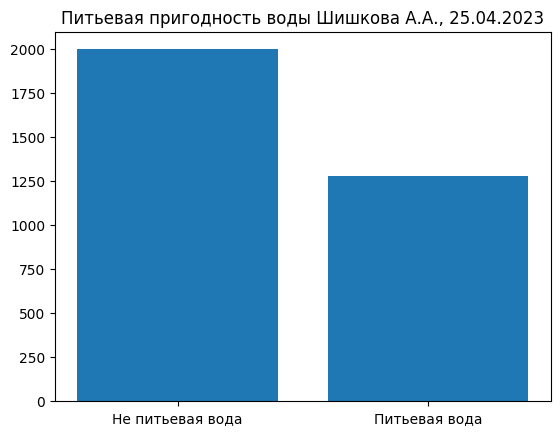

In [ ]:
import matplotlib.pyplot as plt
plt.title("Питьевая пригодность воды Шишкова А.А., 25.04.2023") # заголовок графика
df = list(file_data["Potability"].values)
pot = [0, 0]
keys = ["Не питьевая вода", "Питьевая вода"]
for i in df:
    pot[i] += 1
plt.bar(range(2), pot, tick_label=keys) # отображение графика
plt.show()

# Тестовая и обучающая выборка

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 12345,test_size = 0.25) # разбитие данных на тестовую и обучающую выборку

print(x_train)

             ph    Hardness        Solids  Chloramines     Sulfate  \
2487   9.349470  252.148499  13137.490762     6.173823  320.323984   
302    5.667651  229.928367  16953.898736     8.774306  293.574250   
446   10.464502  190.994848   6700.775054     6.879858    0.000000   
829    5.527633  218.518923  22095.637164     6.436288    0.000000   
2010   8.813505  236.392817  40684.390014     6.608775  303.529818   
...         ...         ...           ...          ...         ...   
2817   8.247958  195.539536  28327.167338     5.378286  281.229853   
546    3.410360  207.397473  49074.730407     5.667433  301.975011   
382    5.772718  213.363545  26124.931415     8.630719  273.279448   
2177   8.026773  169.333843  19168.526773     8.081496  405.527337   
482    7.705711  178.922858  18476.619166     8.226228  334.889911   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
2487    349.816084       13.109898        58.801291   3.778023  
302     554.120536       14.2

# Преобразование Pandas в Numpy

In [ ]:
x_train = x_train.values # преобразование Pandas в Numpy
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values
print(x_test)


[[8.64953495e+00 1.75426670e+02 9.89802221e+03 ... 1.00692542e+01
  0.00000000e+00 5.22980919e+00]
 [6.82393014e+00 1.46130599e+02 1.34678798e+04 ... 1.43076867e+01
  8.15295337e+01 4.01614408e+00]
 [8.43329082e+00 1.61195283e+02 1.59042434e+04 ... 1.53037548e+01
  7.14785008e+01 3.63154293e+00]
 ...
 [6.23419767e+00 2.27560867e+02 2.21952104e+04 ... 1.30397640e+01
  6.31639695e+01 3.88549232e+00]
 [5.59662785e+00 1.77213792e+02 1.79253521e+04 ... 1.03399856e+01
  5.78206111e+01 5.23511112e+00]
 [7.14601972e+00 1.95922102e+02 2.24451733e+04 ... 1.23671092e+01
  5.75306585e+01 5.39347636e+00]]


In [ ]:
y_train_bin = np_utils.to_categorical(y_train) # преобразование y_train
y_test_bin = np_utils.to_categorical(y_test) # преобразование y_test

y_train_bin[0:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

# Модель

In [ ]:
model=Sequential()

model.add(Dense(10, input_dim=9, activation='relu')) # 10 - колическтво входных нейронов
model.add(Dense(10,activation='relu')) # 10 - колическтво нейронов скрытого слоя
model.add(Dense(2,activation='softmax')) # 2 - колическтво выходных нейронов

# Компиляция и обучение модели

In [ ]:
model.compile(loss="binary_crossentropy", optimizer='Adam', metrics=['accuracy'])

In [ ]:
print('Шишкова А.А. 02.05.2023 Обучение модели на train-данных')
history = model.fit(x_train, y_train_bin, epochs=10, batch_size=3) # процесс обучения

Шишкова А.А. 02.05.2023 Обучение модели на train-данных
Epoch 1/10
819/819 [==============================] - 4s 3ms/step - loss: 15.4618 - accuracy: 0.5258
Epoch 2/10
819/819 [==============================] - 2s 3ms/step - loss: 9.0993 - accuracy: 0.5254
Epoch 3/10
819/819 [==============================] - 2s 3ms/step - loss: 9.2526 - accuracy: 0.5291
Epoch 4/10
819/819 [==============================] - 3s 4ms/step - loss: 9.0471 - accuracy: 0.5246
Epoch 5/10
819/819 [==============================] - 3s 4ms/step - loss: 8.5126 - accuracy: 0.5222
Epoch 6/10
819/819 [==============================] - 2s 3ms/step - loss: 7.8153 - accuracy: 0.5210
Epoch 7/10
819/819 [==============================] - 3s 3ms/step - loss: 5.7599 - accuracy: 0.5238
Epoch 8/10
819/819 [==============================] - 2s 3ms/step - loss: 5.8001 - accuracy: 0.5401
Epoch 9/10
819/819 [==============================] - 1s 2ms/step - loss: 5.2609 - accuracy: 0.5442
Epoch 10/10
819/819 [======================

In [ ]:
print('Шишкова А. А., 02.05.2023')
print('Оценка модели на тестовых данных:')
scores = model.evaluate(x_test,y_test_bin)
print('\nAccuracy (Точность модели): %.2f%%' % (scores[1]*100))

print('Функция потерь тестовой выборки и точность модели по тестовой выборке:')
print('test loss, test accuracy:', scores) # оценка точности модели

Шишкова А. А., 02.05.2023
Оценка модели на тестовых данных:
26/26 [==============================] - 0s 2ms/step - loss: 9.9390 - accuracy: 0.6300

Accuracy (Точность модели): 63.00%
Функция потерь тестовой выборки и точность модели по тестовой выборке:
test loss, test accuracy: [9.938957214355469, 0.6300366520881653]


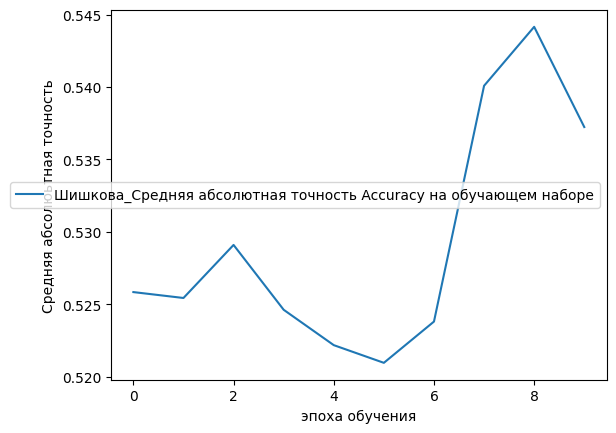

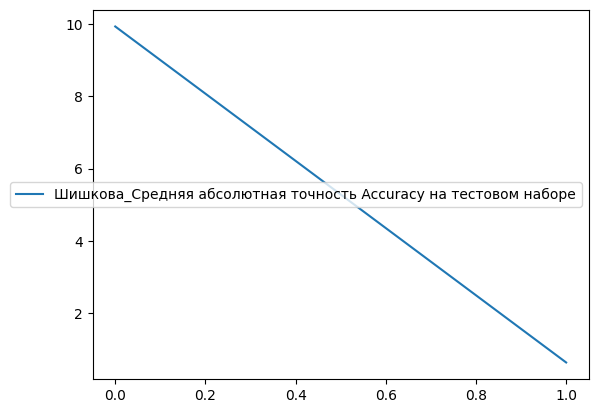

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111) # первая строка, первый столбец (первая ячейка) на сетке Figure

plt.plot(history.history["accuracy"], label="Шишкова_Средняя абсолютная точность Accuracy на обучающем наборе")

# добавление подписи к осям
plt.xlabel("эпоха обучения")
ax.set_ylabel("Средняя абсолюьтная точность")
plt.legend()
plt.show()

# делаем отдельный график для тестовой выборки
plt.plot(scores, label="Шишкова_Средняя абсолютная точность Accuracy на тестовом наборе")
plt.legend()
plt.show()